# 1) Image approximation via orthogonal basis


Given the following RGBA image and its gray scale rendering, stored as matrices of size $(m,n,4)$ and $(m,n)$ respectively, we compute an approximation of the gray scale matrix using an orthogonal basis for the  column space.

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

shape original image (624, 832, 4)


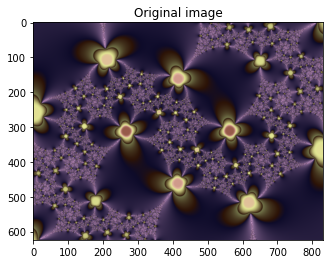

shape gray scale image (624, 832)


Text(0.5, 1.0, 'Gray scale  image')

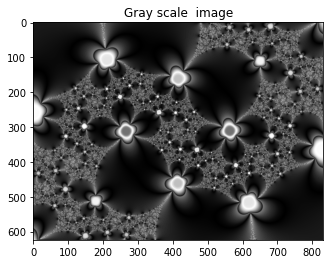

In [2]:
img=mpimg.imread('z2_1_R_complex.png')
print('shape original image',img.shape)
imgplot = plt.imshow(img)
plt.title('Original image')
plt.show()
# gray scale computation
rgb_weights = [0.2989, 0.5870, 0.1140, 1]
imgg=np.dot(img,rgb_weights)
print('shape gray scale image',imgg.shape)
imgplot = plt.imshow(imgg,cmap=plt.get_cmap("gray"))
plt.title('Gray scale  image')

- Perform the URV factorization by using the QR factorization. In order to compute the QR factorization use the scipy routine qr of the  modulus linalg with pivoting set to true in order to have the elements of the rectangular matrix ordered:
    
[Qimg,Rimg,Pimg]=spl.qr(imgg,pivoting=True)

note that Pimg contains the index of the permuted columns  of imgg and the algorithm find an orthogonal matrix Qimg and a rectangular matrix Rimg such that 

imgg[:,Pimg]=Qimg*Rimg

- Then perform the QR factorization on the R transposed suche that $R^\top = VB$. The factorized original matrix can be seen as:
$$
imm[:,Pimg] = Qimg*B.T * V.T
$$


- Given the tolerances $1e-1,5e-2,1e-2,5e-3$, compute an approximation
of the matrix imgg by choosing only nc columns of the matrix Qimg, nc rows of the matrix B and nc columns of the matrix V.  The value for nc is computed as follows: 

  a) extract the diagonal elements of B and copy them in Bdiag,
    
  b) scale the absolute values of Bdiag with respect to its absolute maximum,
    
  c) compute nc as the number of elements of Bdiag that are smaller of the chosen tolerance.
    
- To compare the images compute the correlation between the reconstructed image and the original one by writing the two images as two vectors. 

- Plot the approximate images in gray scale and comment the results.


# 2) Digit recognition

Given the following 'mnist' dataset and the matrices with the test and the training  as below:

In [9]:
import numpy as np
f = open("mnist_test_10.csv", 'r')
m_test = f.readlines()
f.close()

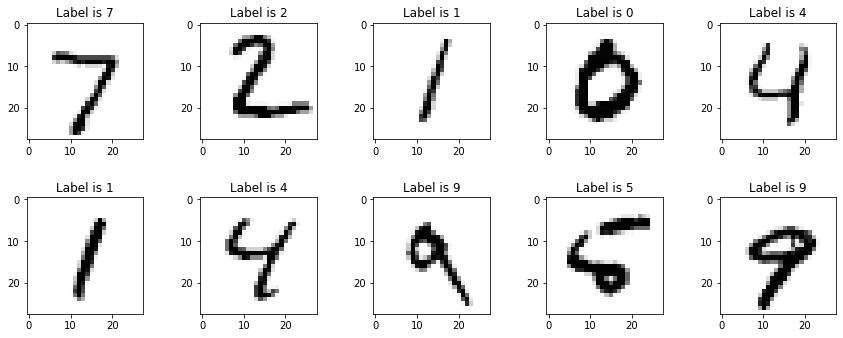

In [13]:
# compute the matrix with the test set
import matplotlib.pylab as plt
fig = plt.figure(figsize=(15,15));
count=1
ncol_img = 28
nrow_img = 28
col_test = len(m_test)
row_test= ncol_img*nrow_img
test_array = np.zeros( (row_test,col_test) )
test_lab = np.zeros((row_test,1))
ik=0
for line in m_test:
    lab_img = line.split(',')
    imarray = np.asfarray(lab_img[1:]).reshape((ncol_img,nrow_img))
    test_array[:,ik] = imarray.reshape(row_test)
    test_lab[ik] = np.asarray(lab_img[0])
    ik = ik+1
    plt.subplot(5,5,count)
    plt.subplots_adjust(hspace=0.5)
    count += 1
    plt.title("Label is " + lab_img[0])
    plt.imshow(imarray, cmap='Greys', interpolation='None')
    pass

In [14]:
f = open("mnist_train_100.csv", 'r')
m_train = f.readlines()
f.close()

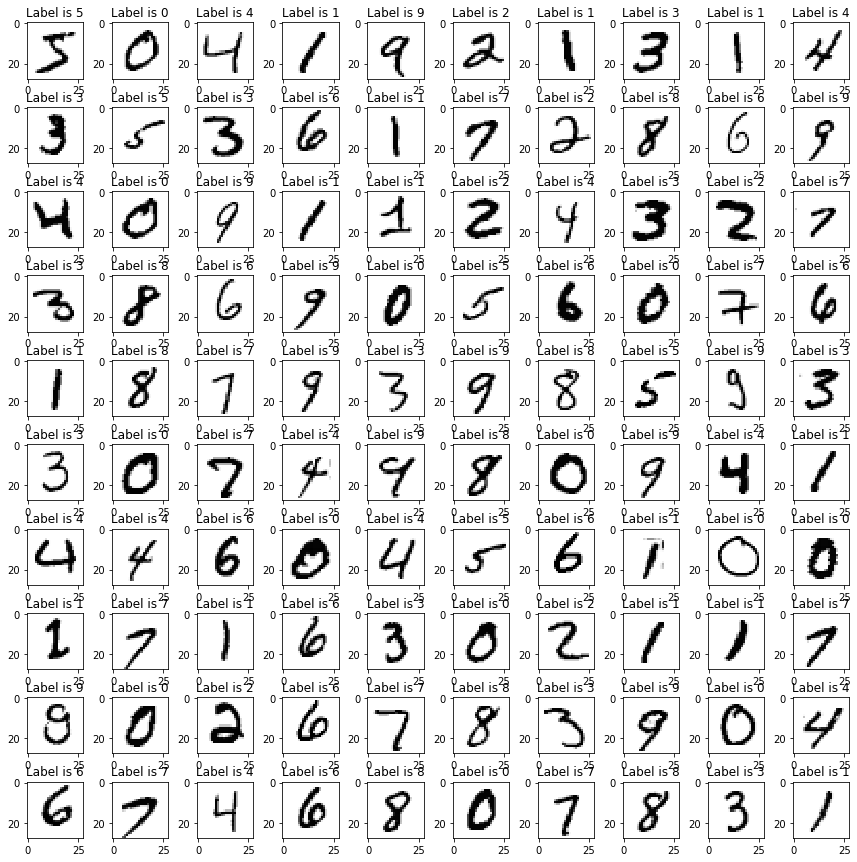

In [15]:
# Compute the matrix with the train set
import matplotlib.pylab as plt
fig = plt.figure(figsize=(15,15));
count=1
ncol_img = 28
nrow_img = 28
col_train = len(m_train)
row_train= ncol_img*nrow_img
train_array = np.zeros( (row_train,col_train) )
train_lab = np.zeros((row_train,1))
ik = 0
for line in m_train:
    lab_img = line.split(',')
    imarray = np.asfarray(lab_img[1:]).reshape((28,28))
    train_array[:,ik] = imarray.reshape(row_train)
    train_lab[ik] = np.asarray(lab_img[0])
    ik = ik+1
    plt.subplot(10,10,count)
    plt.subplots_adjust(hspace=0.5)
    count += 1
    plt.title("Label is " + lab_img[0])
    plt.imshow(imarray, cmap='Greys', interpolation='None')
    pass

- compute the mean image and subtract it from all the other images. Perform the PCA of the resulting matrix. For each digit in the training-set compute its class, that is the mean of the coordinates of the projection in the orthogonal column space defined by the PCA factorization. Determine to which class every digit of the test-set belongs to by computing the minimal two norm distance.

- check and compare all the studied techniques to find the minimal value of k, number of principal components that are useful to classify the digit.

- Classify all the digit in the testset and compute the confusion matrix. That is the matrix where, for each face i, the element of index i,j contains the number of observations known to be in group i and predicted to be in group j. Use sklearn.metrics.confusion_matrix and compute also  the classification report using sklearn.metrics.classification_report.


# 3) Perceptron

Implement a model that describes a linear classifier that divides the Cartesian plane into two halves, the line in the test-data  is $y=-4x +1$. We want to learn a parameter vector such that our model makes the right prediction. This model is called a linear perceptron. Write two cost functions that minimize the distance in the  1-norm and in the infinity norm, respectively. 


In [7]:
import scipy.optimize


In [8]:
def sigmoid(t): return (1-np.exp(-t))/(1+np.exp(-t))
def neuron(w,b,x):return sigmoid(np.inner(w,x)+b)

Train the neuron with the following data:

In [9]:
data = np.array([[[2,-1],+1],
       [[-1,2],-1],
       [[0.5,1.5],1],
       [[-0.5,-0.5],-1]], dtype=object)

data1 = np.array([p[0] for p in data if p[1]>0])
data2 = np.array([p[0] for p in data if p[1]<0])


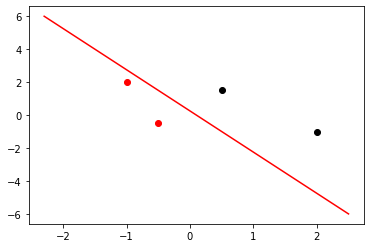

In [10]:
plt.plot([-2.3,2.5],[6,-6],'r', data1[::,0], data1[::,1],'ko',  data2[::,0], data2[::,1],'ro');

Find the correct label for the following dataset:

dataset = np.random.randn(100,2)

- by using scipy.optimize.minimize;
- by implementing the line-search method with the steepest descend direction and constant value of the step-length;
- by implementing the line-search method with the steepest descend direction and with the backtraking approach at each iteration, for the computation of the step-length.

Compare the results obtained with the three methods.